# Fraud Detection Data Exploration

This notebook performs comprehensive exploratory data analysis (EDA) on the credit card fraud detection dataset to understand the data characteristics, distributions, and patterns that will inform our preprocessing and modeling strategies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Starting Fraud Detection Data Exploration...")

Starting Fraud Detection Data Exploration...


## 1. Data Loading and Basic Information

In [2]:
# Load the dataset
import sys
sys.path.append('../src')
from config import RAW_DATA_PATH, PLOT_STYLE

# Set up plotting style
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(PLOT_STYLE)
sns.set_palette("husl")

df = pd.read_csv(RAW_DATA_PATH)

print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())

Dataset shape: (100000, 31)

First 5 rows:
         V1        V2        V3        V4        V5        V6        V7  \
0  0.496714 -0.138264  0.647689  1.523030 -0.234153 -0.234137  1.579213   
1 -0.600639 -0.291694 -0.601707  1.852278 -0.013497 -1.057711  0.822545   
2 -0.839218 -0.309212  0.331263  0.975545 -0.479174 -0.185659 -1.106335   
3 -0.808494 -0.501757  0.915402  0.328751 -0.529760  0.513267  0.097078   
4  0.060230  2.463242 -0.192361  0.301547 -0.034712 -1.168678  1.142823   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.767435 -0.469474  0.542560  ... -0.225776  0.067528 -1.424748 -0.544383   
1 -1.220844  0.208864 -1.959670  ... -1.763040  0.324084 -0.385082 -0.676922   
2 -1.196207  0.812526  1.356240  ... -0.299007  0.091761 -1.987569 -0.219672   
3  0.968645 -0.702053 -0.327662  ...  0.404051  1.886186  0.174578  0.257550   
4  0.751933  0.791032 -0.909387  ...  0.473592 -0.919424  1.549934 -0.783253   

        V26       V27    

In [3]:
# Basic information about the dataset
print("\nDataset Info:")
print(df.info())

print("\n\nDescriptive Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      100000 non-null  float64
 1   V2      100000 non-null  float64
 2   V3      100000 non-null  float64
 3   V4      100000 non-null  float64
 4   V5      100000 non-null  float64
 5   V6      100000 non-null  float64
 6   V7      100000 non-null  float64
 7   V8      100000 non-null  float64
 8   V9      100000 non-null  float64
 9   V10     100000 non-null  float64
 10  V11     100000 non-null  float64
 11  V12     100000 non-null  float64
 12  V13     100000 non-null  float64
 13  V14     100000 non-null  float64
 14  V15     100000 non-null  float64
 15  V16     100000 non-null  float64
 16  V17     100000 non-null  float64
 17  V18     100000 non-null  float64
 18  V19     100000 non-null  float64
 19  V20     100000 non-null  float64
 20  V21     100000 non-null  float64
 

## 2. Target Variable Analysis (Class Distribution)

In [4]:
# Analyze the target variable
class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100

print("Class Distribution:")
print(f"Normal transactions: {class_counts[0]} ({class_percentages[0]:.2f}%)")
print(f"Fraudulent transactions: {class_counts[1]} ({class_percentages[1]:.2f}%)")
print(f"\nClass imbalance ratio: {class_counts[0]/class_counts[1]:.1f}:1")

Class Distribution:
Normal transactions: 99809 (99.81%)
Fraudulent transactions: 191 (0.19%)

Class imbalance ratio: 522.6:1


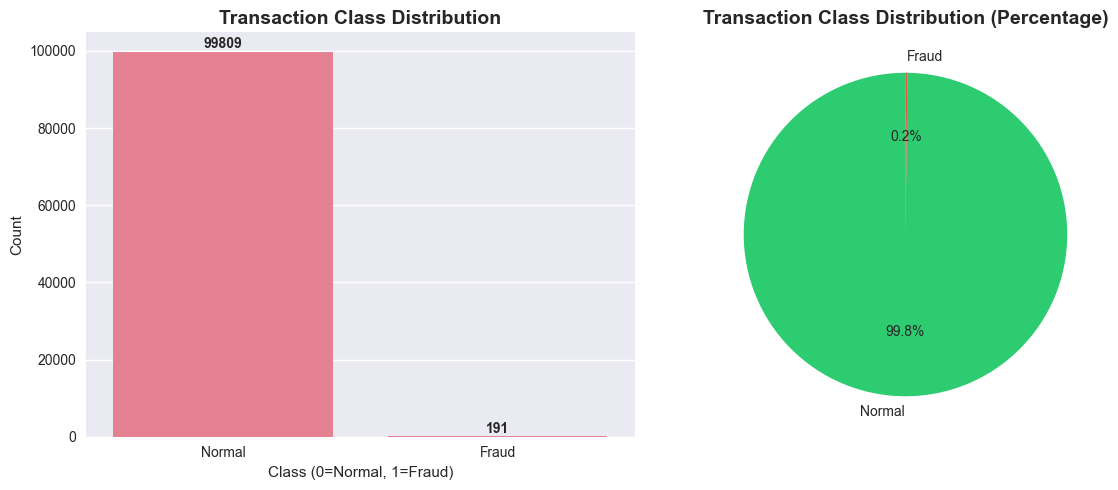

In [5]:
# Visualize class distribution
plt.figure(figsize=(12, 5))

# Subplot 1: Count plot
plt.subplot(1, 2, 1)
sns.countplot(x='Class', data=df)
plt.title('Transaction Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Class (0=Normal, 1=Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Fraud'])

# Add count labels on bars
for i, count in enumerate(class_counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontweight='bold')

# Subplot 2: Pie chart
plt.subplot(1, 2, 2)
colors = ['#2ecc71', '#e74c3c']
plt.pie(class_percentages.values, labels=['Normal', 'Fraud'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Transaction Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 3. Feature Analysis

In [6]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {list(X.columns)}")

Number of features: 30
Feature names: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time', 'Amount']


/var/folders/bs/wk3rp5yd4z3g6_l22q2kj3440000gn/T/ipykernel_71396/3531333281.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Class']==0]['Amount'], df[df['Class']==1]['Amount']], labels=['Normal', 'Fraud'])
/var/folders/bs/wk3rp5yd4z3g6_l22q2kj3440000gn/T/ipykernel_71396/3531333281.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Class']==0]['Time'], df[df['Class']==1]['Time']], labels=['Normal', 'Fraud'])


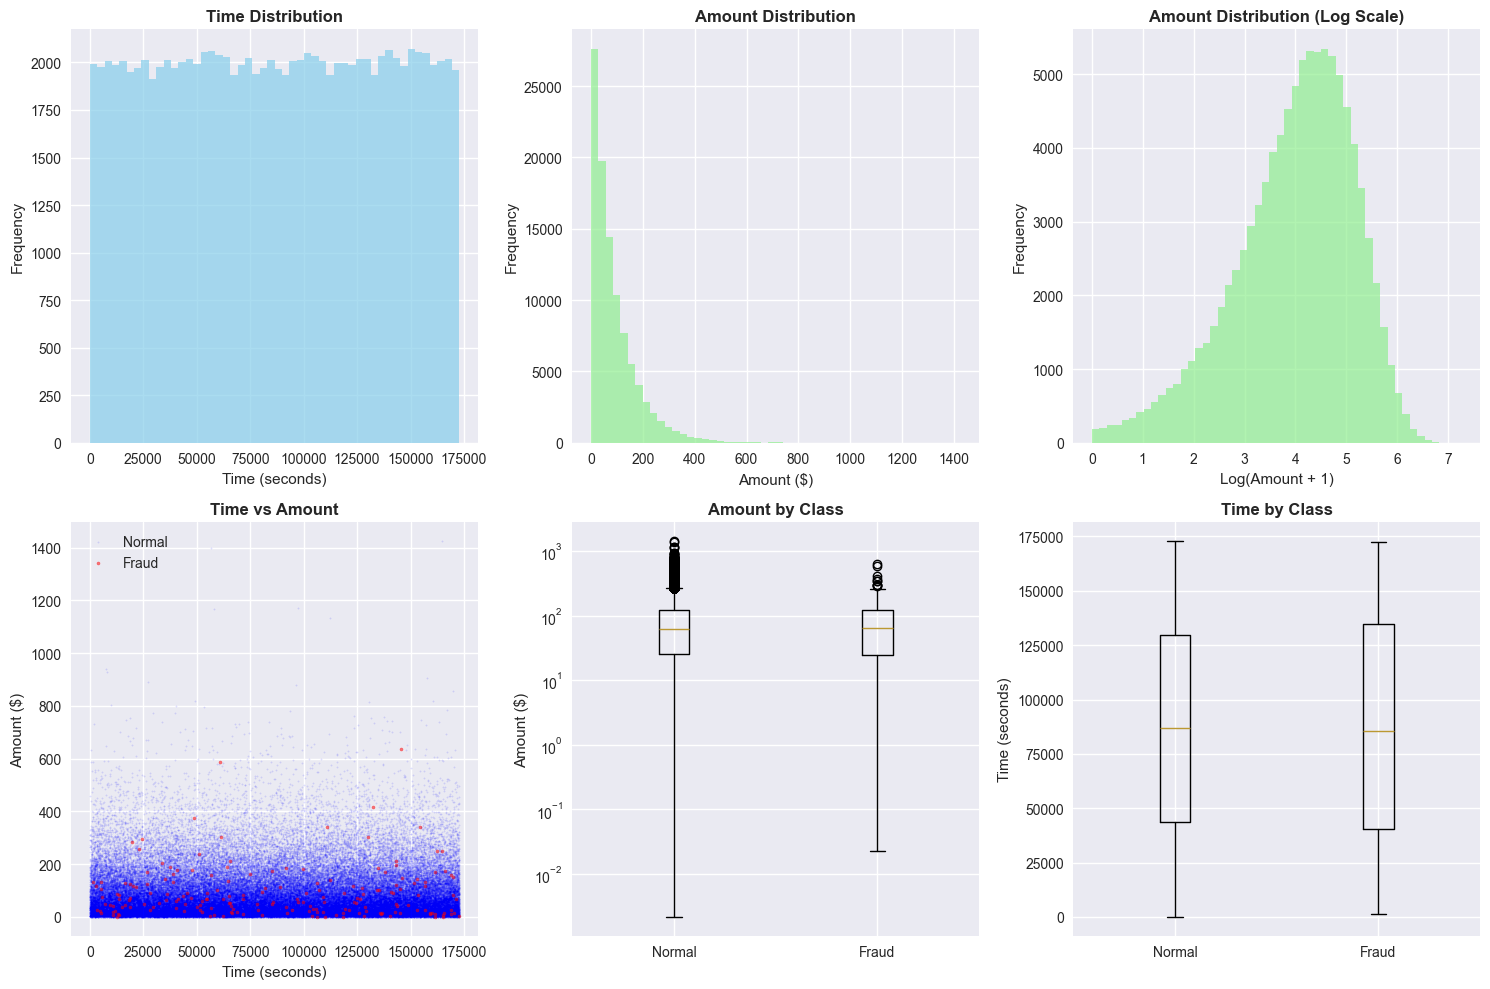

In [7]:
# Analyze Time and Amount features (the only non-PCA features)
plt.figure(figsize=(15, 10))

# Time distribution
plt.subplot(2, 3, 1)
plt.hist(df['Time'], bins=50, alpha=0.7, color='skyblue')
plt.title('Time Distribution', fontweight='bold')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

# Amount distribution
plt.subplot(2, 3, 2)
plt.hist(df['Amount'], bins=50, alpha=0.7, color='lightgreen')
plt.title('Amount Distribution', fontweight='bold')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')

# Log scale for Amount to see the distribution better
plt.subplot(2, 3, 3)
plt.hist(np.log1p(df['Amount']), bins=50, alpha=0.7, color='lightgreen')
plt.title('Amount Distribution (Log Scale)', fontweight='bold')
plt.xlabel('Log(Amount + 1)')
plt.ylabel('Frequency')

# Time vs Amount scatter plot
plt.subplot(2, 3, 4)
plt.scatter(df[df['Class']==0]['Time'], df[df['Class']==0]['Amount'], alpha=0.1, color='blue', label='Normal', s=1)
plt.scatter(df[df['Class']==1]['Time'], df[df['Class']==1]['Amount'], alpha=0.5, color='red', label='Fraud', s=5)
plt.title('Time vs Amount', fontweight='bold')
plt.xlabel('Time (seconds)')
plt.ylabel('Amount ($)')
plt.legend()

# Amount by class
plt.subplot(2, 3, 5)
plt.boxplot([df[df['Class']==0]['Amount'], df[df['Class']==1]['Amount']], labels=['Normal', 'Fraud'])
plt.title('Amount by Class', fontweight='bold')
plt.ylabel('Amount ($)')
plt.yscale('log')

# Time by class
plt.subplot(2, 3, 6)
plt.boxplot([df[df['Class']==0]['Time'], df[df['Class']==1]['Time']], labels=['Normal', 'Fraud'])
plt.title('Time by Class', fontweight='bold')
plt.ylabel('Time (seconds)')

plt.tight_layout()
plt.show()

## 4. PCA Features Analysis (V1-V28)

In [8]:
# Analyze PCA features (V1-V28)
pca_features = [f'V{i}' for i in range(1, 29)]

print("PCA Features Statistics:")
print(df[pca_features].describe().T[['mean', 'std', 'min', 'max']].round(3))

PCA Features Statistics:
      mean    std    min    max
V1   0.000  0.999 -4.415  4.602
V2   0.001  1.003 -4.319  4.828
V3  -0.003  1.004 -4.404  4.098
V4   0.000  1.004 -4.369  4.536
V5   0.001  1.000 -4.338  4.065
V6   0.002  1.000 -4.466  4.984
V7  -0.000  1.004 -4.320  4.387
V8  -0.004  1.000 -4.158  3.980
V9  -0.001  0.999 -4.534  4.611
V10 -0.003  0.999 -4.448  4.679
V11  0.000  1.000 -4.597  4.398
V12 -0.001  0.999 -4.432  4.659
V13 -0.003  1.000 -3.949  4.337
V14  0.000  1.004 -4.625  4.289
V15  0.001  1.000 -4.484  4.369
V16  0.001  1.001 -4.513  4.596
V17 -0.002  0.999 -4.230  4.186
V18 -0.005  0.999 -4.521  4.016
V19 -0.003  1.000 -4.980  4.059
V20 -0.002  0.998 -4.644  4.365
V21  0.000  1.000 -4.829  4.215
V22 -0.003  0.999 -4.062  4.290
V23  0.002  0.998 -3.977  4.352
V24 -0.004  1.001 -4.435  4.562
V25 -0.002  1.001 -4.280  4.271
V26  0.003  1.005 -4.067  4.616
V27 -0.001  1.000 -4.295  4.295
V28  0.004  0.999 -3.963  4.157


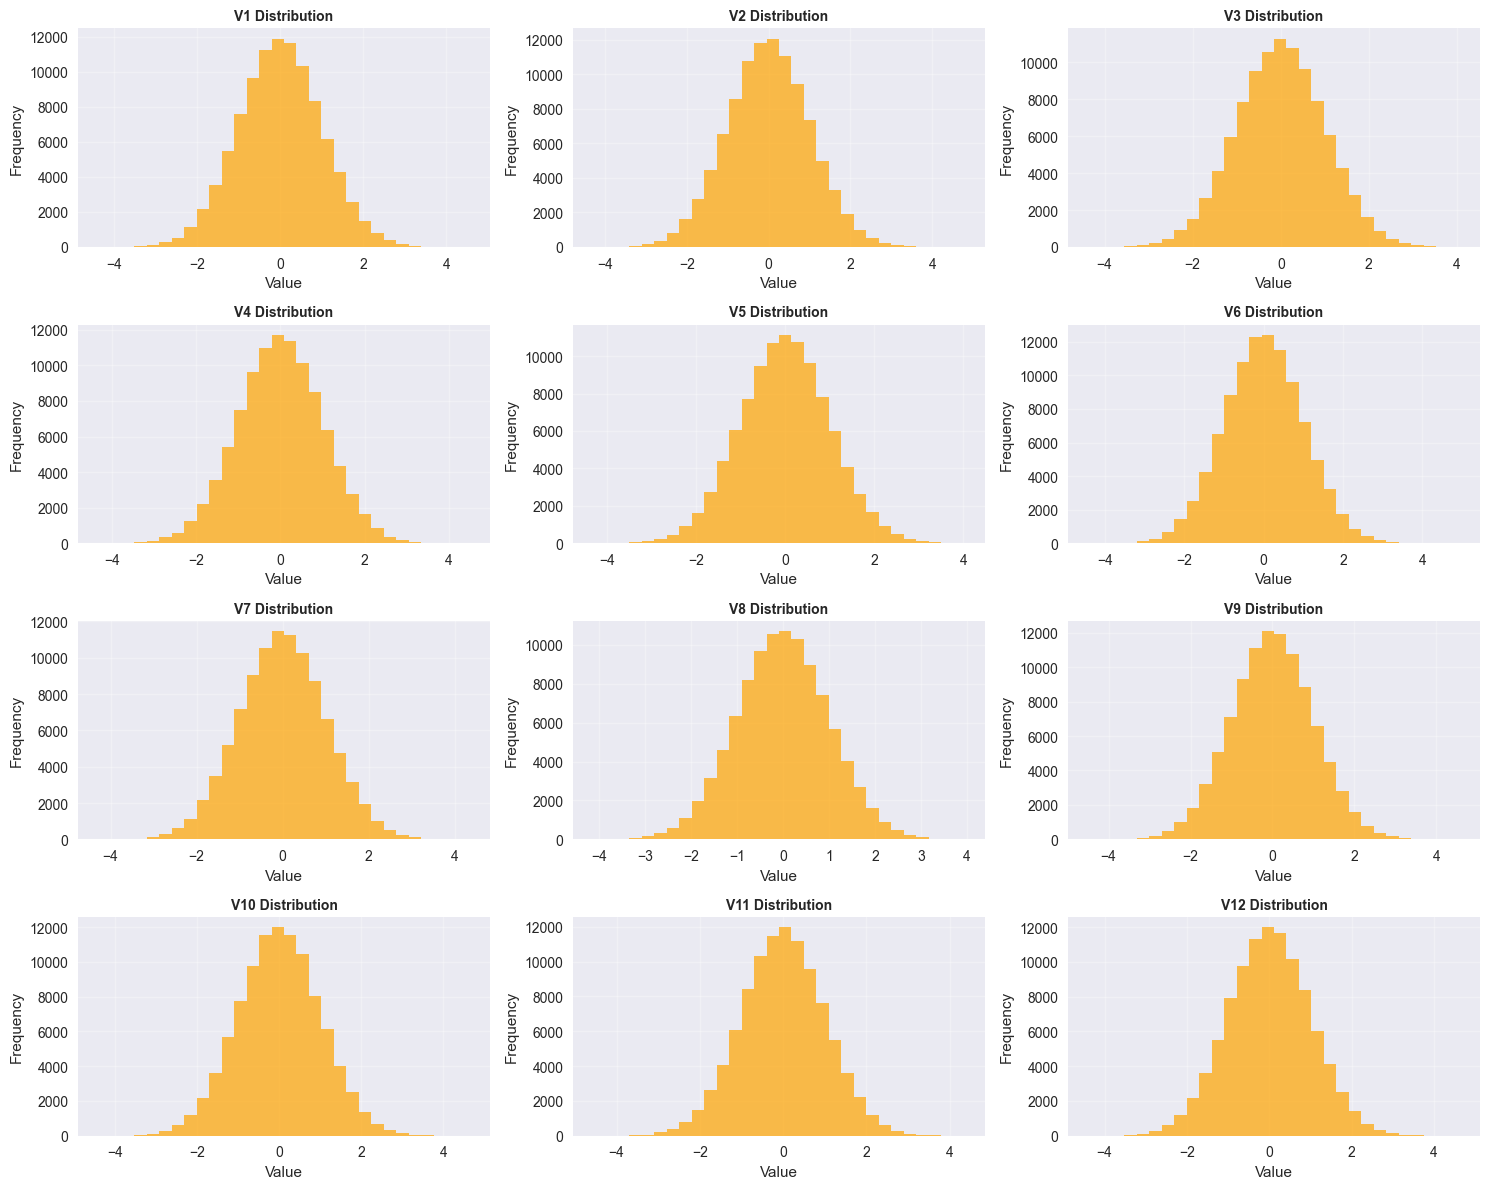

In [9]:
# Distribution of first 12 PCA features
plt.figure(figsize=(15, 12))

for i, feature in enumerate(pca_features[:12], 1):
    plt.subplot(4, 3, i)
    plt.hist(df[feature], bins=30, alpha=0.7, color='orange')
    plt.title(f'{feature} Distribution', fontsize=10, fontweight='bold')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Feature Correlations

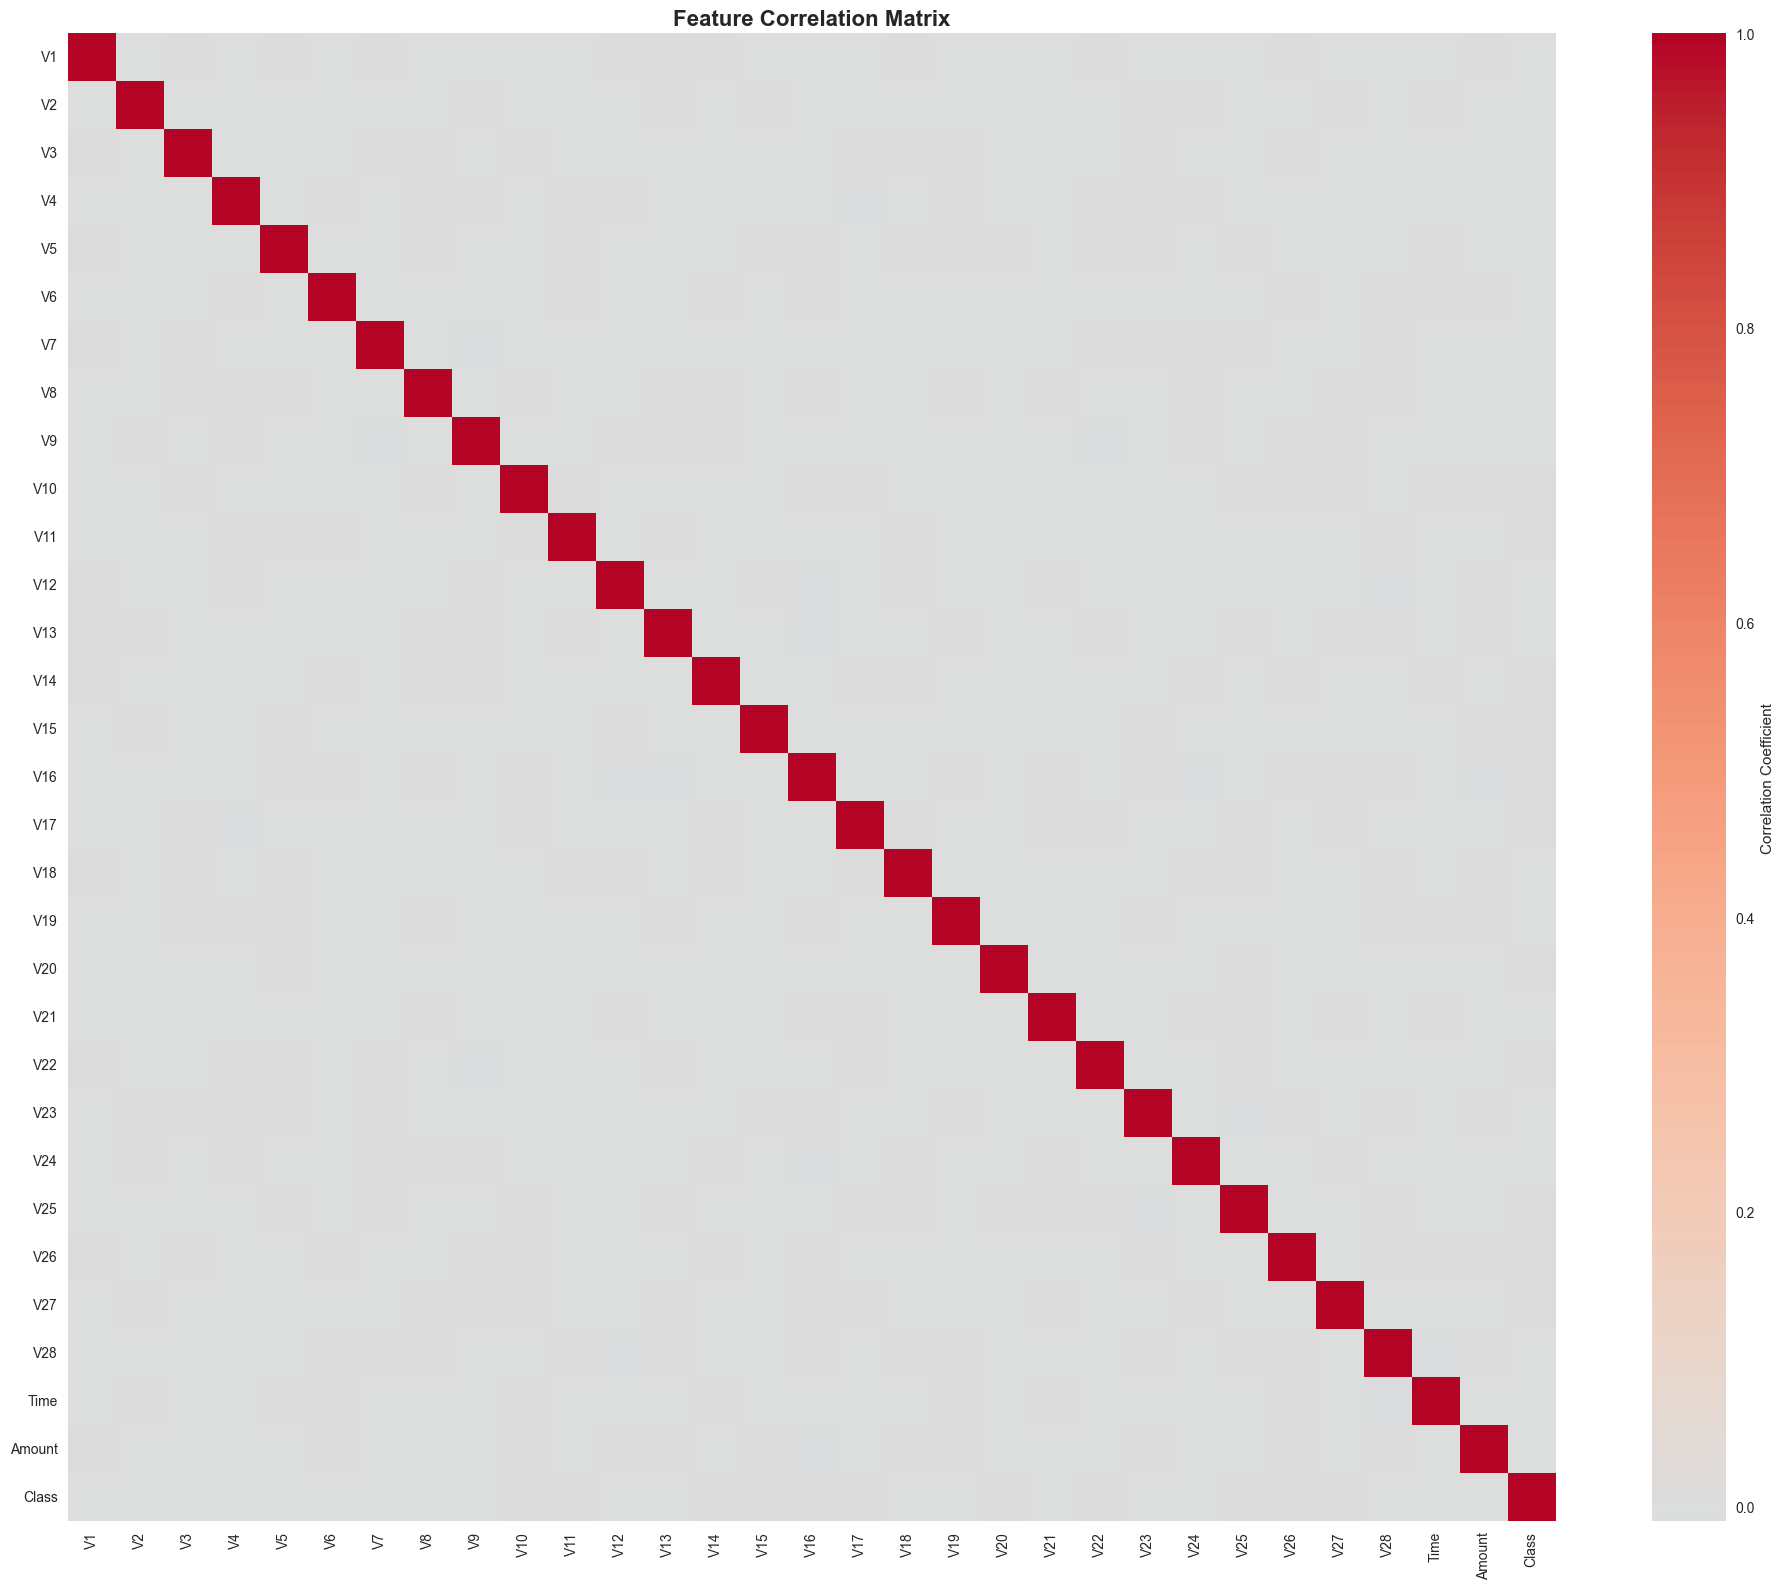

In [10]:
# Correlation matrix for all features
plt.figure(figsize=(20, 16))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, 
            annot=False, 
            cmap='coolwarm', 
            center=0,
            square=True,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Correlation of features with the target variable
correlations_with_target = df.corr()['Class'].sort_values(ascending=False)

print("Features most correlated with fraud (Class=1):")
print(correlations_with_target.head(10))

print("\nFeatures most negatively correlated with fraud (Class=0):")
print(correlations_with_target.tail(10))

/var/folders/bs/wk3rp5yd4z3g6_l22q2kj3440000gn/T/ipykernel_71396/835809904.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


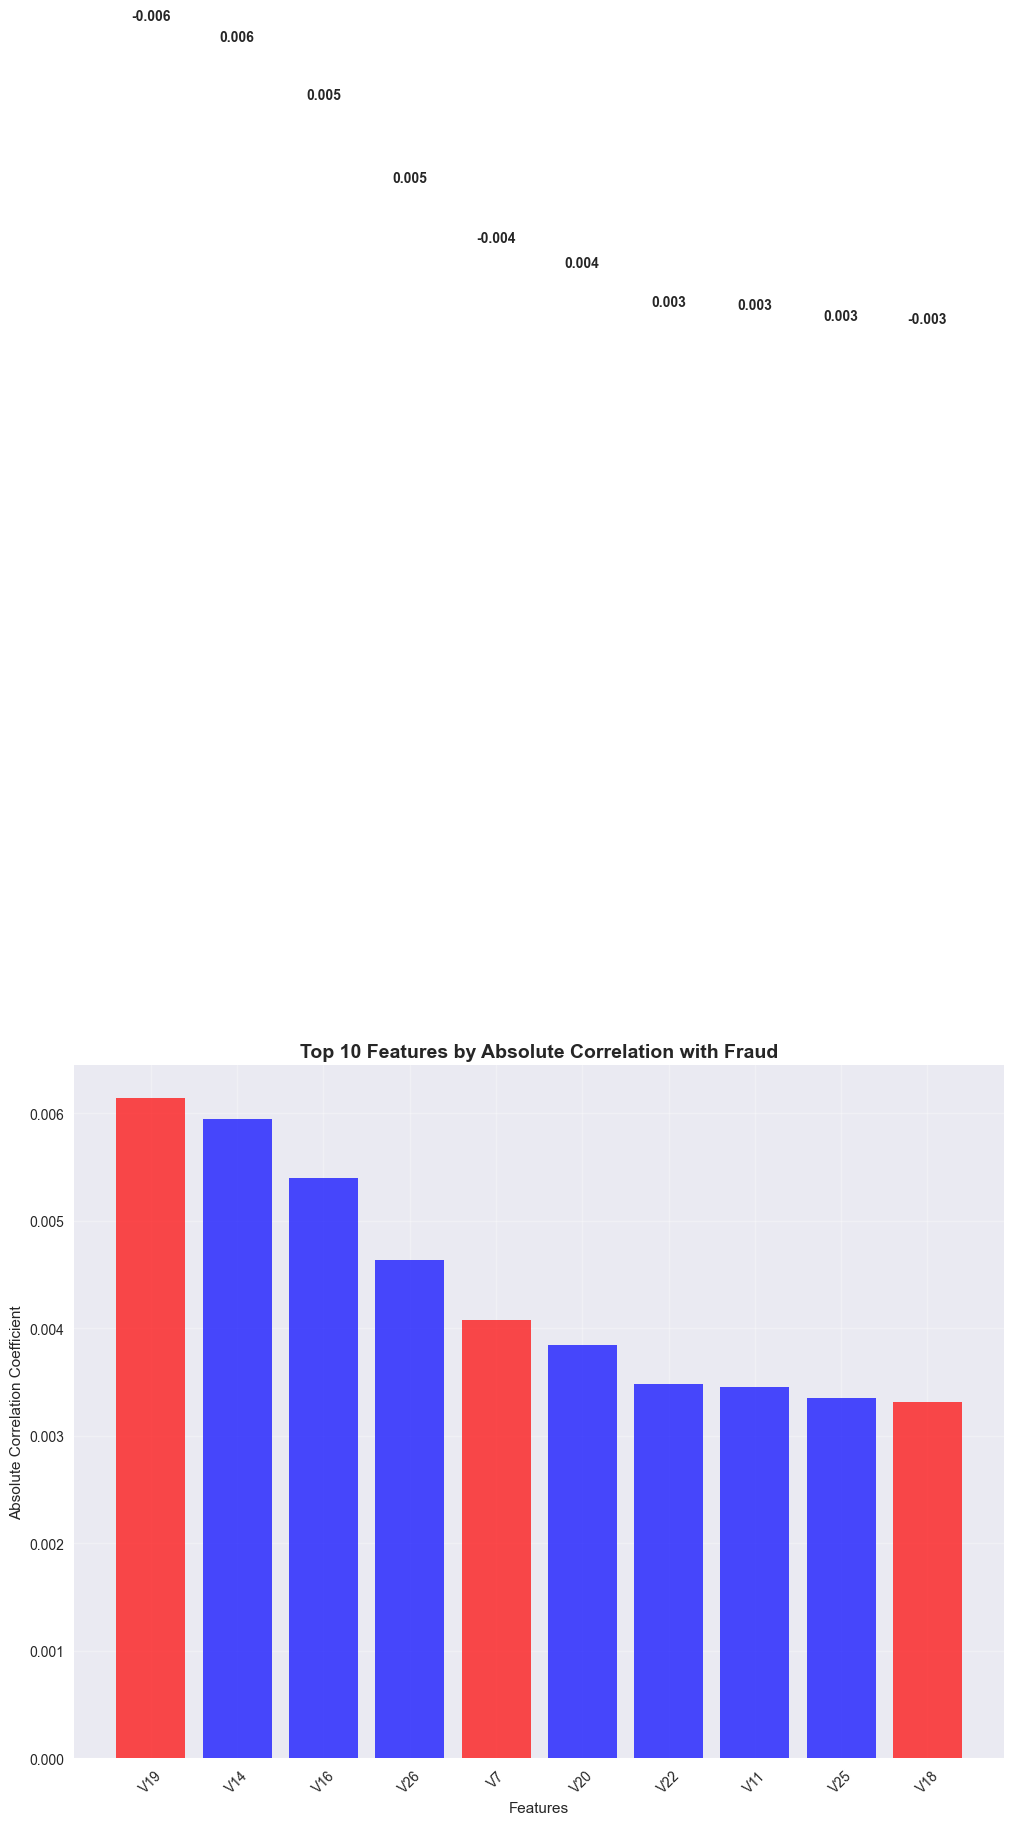

In [13]:
# Compute correlations with the target
correlations_with_target = df.corr()['Class']

# Visualize correlations with target
plt.figure(figsize=(12, 9))

# Remove the target variable itself
target_correlations = correlations_with_target.drop('Class')

# Plot top 10 most correlated features
top_features = abs(target_correlations).sort_values(ascending=False).head(10)
colors = ['red' if target_correlations[feat] < 0 else 'blue' for feat in top_features.index]

plt.bar(range(len(top_features)), top_features.values, color=colors, alpha=0.7)
plt.xticks(range(len(top_features)), top_features.index, rotation=45)
plt.title('Top 10 Features by Absolute Correlation with Fraud', fontsize=14, fontweight='bold')
plt.ylabel('Absolute Correlation Coefficient')
plt.xlabel('Features')
plt.grid(True, alpha=0.3)

# Add correlation values on bars
for i, (feature, value) in enumerate(zip(top_features.index, top_features.values)):
    corr_value = target_correlations[feature]
    plt.text(i, value + 0.01, f'{corr_value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Missing Values and Data Quality

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("\n✅ No missing values found in the dataset")
else:
    print(f"\n⚠️ Found {missing_values.sum()} missing values")

Missing values per column:
Series([], dtype: int64)

✅ No missing values found in the dataset


In [15]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"\n⚠️ Found {duplicates} duplicate rows")
    print("Removing duplicates...")
    df = df.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df.shape}")
else:
    print("\n✅ No duplicate rows found")

Duplicate rows: 0

✅ No duplicate rows found


## 7. Feature Distributions by Class

Normal transactions: 99809
Fraud transactions: 191


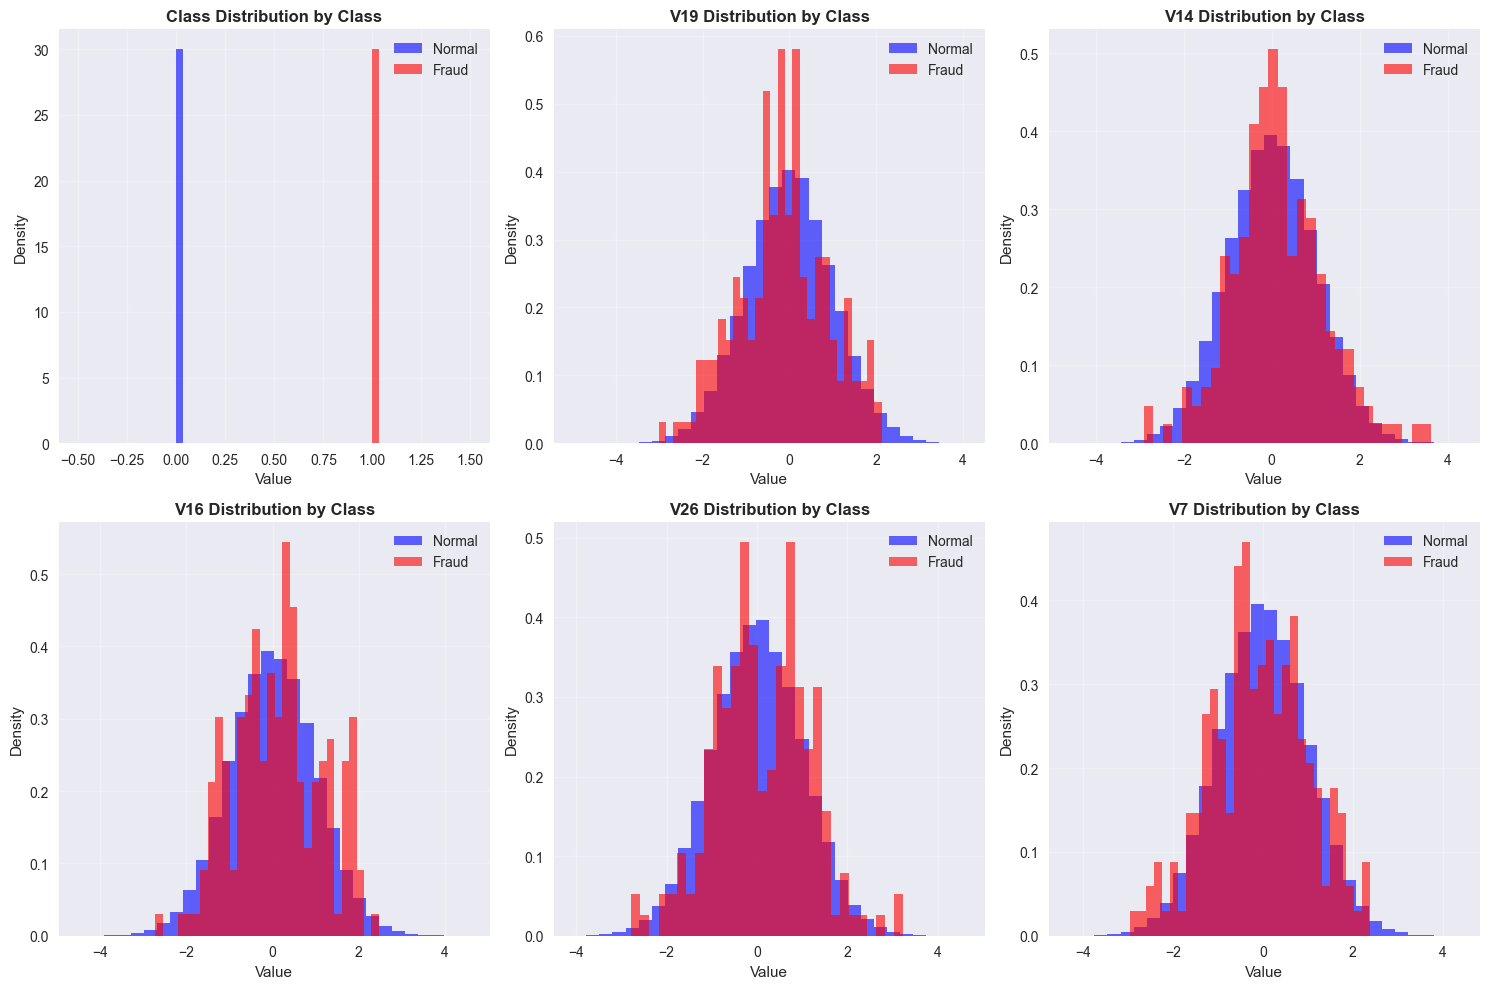

In [16]:
# Compare feature distributions between normal and fraud transactions
normal_data = df[df['Class'] == 0]
fraud_data = df[df['Class'] == 1]

print(f"Normal transactions: {len(normal_data)}")
print(f"Fraud transactions: {len(fraud_data)}")

# Distribution comparison for top correlated features
top_correlated_features = abs(correlations_with_target).sort_values(ascending=False).head(6).index.tolist()

plt.figure(figsize=(15, 10))

for i, feature in enumerate(top_correlated_features, 1):
    plt.subplot(2, 3, i)
    
    # Normal transactions
    plt.hist(normal_data[feature], bins=30, alpha=0.6, label='Normal', color='blue', density=True)
    
    # Fraud transactions
    plt.hist(fraud_data[feature], bins=30, alpha=0.6, label='Fraud', color='red', density=True)
    
    plt.title(f'{feature} Distribution by Class', fontweight='bold')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Summary and Insights

In [17]:
print("="*60)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   - Total transactions: {len(df):,}")
print(f"   - Features: {len(X.columns)}")
print(f"   - Target classes: 2 (Normal=0, Fraud=1)")

print(f"\n🎯 CLASS IMBALANCE:")
print(f"   - Normal transactions: {class_counts[0]:,} ({class_percentages[0]:.2f}%)")
print(f"   - Fraud transactions: {class_counts[1]:,} ({class_percentages[1]:.2f}%)")
print(f"   - Imbalance ratio: {class_counts[0]/class_counts[1]:.1f}:1")
print(f"   ⚠️  This is a highly imbalanced dataset!")

print(f"\n💰 AMOUNT ANALYSIS:")
print(f"   - Mean amount (Normal): ${df[df['Class']==0]['Amount'].mean():.2f}")
print(f"   - Mean amount (Fraud): ${df[df['Class']==1]['Amount'].mean():.2f}")
print(f"   - Max amount: ${df['Amount'].max():.2f}")
print(f"   - Min amount: ${df['Amount'].min():.2f}")

print(f"\n⏰ TIME ANALYSIS:")
print(f"   - Time range: {df['Time'].min():.0f}s to {df['Time'].max():.0f}s")
print(f"   - Total duration: {(df['Time'].max() - df['Time'].min())/3600:.1f} hours")

print(f"\n🔍 FEATURE INSIGHTS:")
print(f"   - PCA features (V1-V28): All standardized, mean ≈ 0")
print(f"   - Most correlated with fraud: {top_features.index[0]}")
print(f"   - Strongest negative correlation: {target_correlations.idxmin()}")

print(f"\n✅ DATA QUALITY:")
print(f"   - Missing values: {missing_values.sum()}")
print(f"   - Duplicate rows: {duplicates}")
print(f"   - Data type consistency: All numeric")

print("\n" + "="*60)
print("RECOMMENDATIONS FOR PREPROCESSING:")
print("="*60)
print("1. Handle class imbalance using:")
print("   - Undersampling majority class")
print("   - Oversampling minority class (SMOTE)")
print("   - Class weights in models")
print("\n2. Feature scaling:")
print("   - Amount feature needs scaling (wide range)")
print("   - Time feature may benefit from scaling")
print("   - PCA features already standardized")
print("\n3. Feature engineering opportunities:")
print("   - Time-based features (hour of day, day of week)")
print("   - Amount-based features (log transformation)")
print("   - Interaction features between top correlated variables")
print("\n4. Model considerations:")
print("   - Use metrics suitable for imbalanced data (AUC-ROC, Precision-Recall)")
print("   - Focus on recall to minimize false negatives (missed fraud)")
print("   - Consider cost-sensitive learning")

EXPLORATORY DATA ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
   - Total transactions: 100,000
   - Features: 30
   - Target classes: 2 (Normal=0, Fraud=1)

🎯 CLASS IMBALANCE:
   - Normal transactions: 99,809 (99.81%)
   - Fraud transactions: 191 (0.19%)
   - Imbalance ratio: 522.6:1
   ⚠️  This is a highly imbalanced dataset!

💰 AMOUNT ANALYSIS:
   - Mean amount (Normal): $89.10
   - Mean amount (Fraud): $90.28
   - Max amount: $1424.41
   - Min amount: $0.00

⏰ TIME ANALYSIS:
   - Time range: 1s to 172790s
   - Total duration: 48.0 hours

🔍 FEATURE INSIGHTS:
   - PCA features (V1-V28): All standardized, mean ≈ 0
   - Most correlated with fraud: V19
   - Strongest negative correlation: V19

✅ DATA QUALITY:
   - Missing values: 0
   - Duplicate rows: 0
   - Data type consistency: All numeric

RECOMMENDATIONS FOR PREPROCESSING:
1. Handle class imbalance using:
   - Undersampling majority class
   - Oversampling minority class (SMOTE)
   - Class weights in models

2. Feature scaling:
   - Amoun